# 实验一：数值积分与数值微分

## 第一题：数值积分

### 0.数值积分方法

对于积分$\int_a^bf(x)dx$，可以使用以下三种方法来计算其积分值。

**(1).复合梯形公式**

对于给定的区间等分数$n$，其在$[a,b]$的节点为$x_i=a+\frac{b-a}{n}i,i=0,1,...,n$。则此时的复合梯形公式为：

$$\int_a^b f(x)dx\approx T_n=\frac{h}{2}[f(a)+2\sum_{i=1}^{n-1}f(x_i)+f(b)]$$

其中，$h=\frac{b-a}{n}$。

可以用以下函数实现复合梯形公式：

In [27]:
# Import
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# 1.使用复合梯形公式求两个积分值
def trape(a, b, n, f):
    h = (b-a)/n
    array0 = np.array([f(a+k*h) for k in range(0,n+1)])
    sum0 = array0[1:n].sum()
    Tn = 1/2*h*(2*sum0+array0[0]+array0[n])
    return Tn

**(2).复合辛普森公式**

对于给定的区间等分数$n$，其在$[a,b]$的节点为$x_i=a+\frac{b-a}{n}i,i=0,1,...,n$。则此时的复合辛普森公式为：

$$\int_a^b f(x)dx\approx S_n=\frac{h}{6}[f(a)+2\sum_{i=1}^{n-1}f(x_i)+4\sum_{i=0}^{n-1}f(x_{i+\frac{1}{2}})+f(b)]$$
其中，$h=\frac{b-a}{n}$，$x_{i+\frac{1}{2}}=\frac{1}{2}(x_i+x_{i+1})$。

可以用以下函数实现复合辛普森公式：

In [29]:
def simp(a, b, n, f):
    h = (b-a)/n
    array0 = np.array([f(a+k*h) for k in range(0,n+1)])
    array1 = np.array([f(a+k*h+h/2) for k in range(0,n)])
    sum0 = array0[1:n].sum()
    sum1 = array1.sum()
    Sn = 1/6*h*(2*sum0+4*sum1+array0[0]+array0[n])
    return Sn

**(3).龙贝格求积公式**

对于将区间$[a,b]n$等分的复合梯形公式，记$T_n=T(h)=\frac{h}{2}[f(a)+2\sum_{i=1}^{n-1}f(x_i)+f(b)]$。若对$n$个区间再二等分，即对区间$2n$等分，则有：

$$
\begin{aligned}
T_{2n}=T(\frac{h}{2})&=\frac{h}{4}[f(a)+2\sum_{i=1}^{n-1}f(x_i)+2\sum_{i=0}^{n-1}f(x_{i+\frac{1}{2}})+f(b)]\\
&=\frac{h}{4}[f(a)+2\sum_{i=1}^{n-1}f(x_i)+f(b)]+\frac{h}{2}\sum_{i=0}^{n-1}f(x_{i+\frac{1}{2}})\\
&=\frac{1}{2}T(h)+\frac{h}{2}\sum_{i=0}^{n-1}f(x_{i+\frac{1}{2}})
\end{aligned}
$$

由于$I-T(h)=-\frac{b-a}{12}h^2f''(\eta)$，所以$T(h)=I+O(h^2)$，且$\lim\limits_{h\to0}T(h)=I$。因此对$T(h)$按$h$展开有：

$$
\begin{aligned}
&T_n=T(h)=I+\alpha_1h^2+\alpha_2h^4+...+\alpha_lh^{2l}+...\\
&T_{2n}=T(\frac{h}{2})=I+\alpha_1(\frac{h}{2})^2+\alpha_2(\frac{h}{2})^4+...+\alpha_l(\frac{h}{2})^{2l}+...\\
\implies &\frac{4T(\frac{h}{2})-T(h)}{3}=I-\frac{\alpha_2}{4}h^4+...=I+O(h^4)
\end{aligned}
$$
因此，可以通过加权平均将误差的结束从$O(h^2)$降至$O(h^4)$。记$T_0(h)=T(h)$，则可以通过$T_1(h)=\frac{4T_0(\frac{h}{2})-T_0(h)}{3}=\frac{4T(\frac{h}{2})-T(h)}{3}$降低误差的精度。同理，可以通过$T_2(h)=\frac{4T_1(\frac{h}{2})-T_1(h)}{3}$将误差降至$O(h^6)$。

此方法称为理查森外推，若连续使用此方法，则可得到龙贝格求积公式，其思路如下：

1. 计算第$k$次迭代时的复合梯形求积公式$T_0^{(k)}=T_{2^k}=T(\frac{h}{2^k})$。
2. 不断对当前所得出的积分值进行理查森加速得到$T_m^{(k)},m=1,2,...,k$，其中$T_m^{(k)}=\frac{4^mT_{m-1}^{(k+1)}-T_{m-1}^{(k)}}{4^m-1}$。
3. 若$|T_k^{(k)}-T_{k-1}^{(k-1)}|<\epsilon$，则输出$T_k^{(k)}$。
4. 回到第1步进行迭代。

可以用以下函数实现龙贝格求积公式：

In [30]:
# 3.Romberg algorism
def my_romberg(f, a, b, n):
    mat = np.zeros((n+1,n+1),float)
    h = b-a
    c2 = 1
    mat[0,0] = 1/2*h*(f(a)+f(b))
    for i in range(1, n+1):
        h = h/2
        c2 = 2 * c2
        sum = np.array([f(a+k*h) for k in range(1,c2,2)]).sum()
        mat[i,0] = mat[i-1,0]/2+sum*h
        c4 = 1
        for j in range(1, i+1):
            c4 = 4 * c4
            mat[i,j] = mat[i,j-1] + (mat[i,j-1]-mat[i-1,j-1])/(c4-1)
    return mat

### 1.$\int_{-1.96}^{1.96}\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}dx$



In [31]:
def f0(x):
    y = 1/np.sqrt(2*np.pi)*np.exp(-x*x/2)
    return y

**(1).复合梯形公式**

复合梯形公式的求积结果如下：

In [32]:
a0 = -1.96
b0 = 1.96
for n in [2,10,50,100,300,500]:
    print("n = ", n, " Tn_0 = ", "%.5f" %trape(a0,b0,n,f0))

n =  2  Tn_0 =  0.89647
n =  10  Tn_0 =  0.94708
n =  50  Tn_0 =  0.94989
n =  100  Tn_0 =  0.94997
n =  300  Tn_0 =  0.95000
n =  500  Tn_0 =  0.95000


保留五位小数，最终计算结果为0.95000

**(2).复合辛普森公式**

复合辛普森公式的求积结果如下：

In [33]:
for n in [2,10,50,100,500]:
    print("n = ", n, " Tn_0 = ", "%.5f" %simp(a0,b0,n,f0))
print()

n =  2  Tn_0 =  0.94382
n =  10  Tn_0 =  0.95000
n =  50  Tn_0 =  0.95000
n =  100  Tn_0 =  0.95000
n =  500  Tn_0 =  0.95000



保留五位小数，最终计算结果为0.95000

**(3).龙贝格求积公式**

龙贝格公式的求积结果如下：

In [34]:
print("f1(x)的龙贝格算法矩阵，n=6")
print(my_romberg(f0,a0,b0,6))

f1(x)的龙贝格算法矩阵，n=6
[[0.2290885  0.         0.         0.         0.         0.
  0.        ]
 [0.89647112 1.11893199 0.         0.         0.         0.
  0.        ]
 [0.93198216 0.94381918 0.93214499 0.         0.         0.
  0.        ]
 [0.9454369  0.94992182 0.95032866 0.95061729 0.         0.
  0.        ]
 [0.94885927 0.95000006 0.95000527 0.95000014 0.94999772 0.
  0.        ]
 [0.94971779 0.95000396 0.95000422 0.95000421 0.95000422 0.95000423
  0.        ]
 [0.94993259 0.95000419 0.95000421 0.95000421 0.95000421 0.95000421
  0.95000421]]


保留五位小数，最终计算结果为0.95000

**(4).复合梯形公式和复合辛普森公式的比较**

已知积分$\int_{-1.96}^{1.96}\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}dx=0.95000$，则使用复合梯形公式和复合辛普森公式的误差如下表所示：

| n | 复合梯形公式的误差 | 复合辛普森公式的误差 | 
| :----:| :----: | :----: |
| 1 |  -7.20911498e-01|   1.68931993e-01|  
| 5 |  -1.16123432e-02 |  -2.62577851e-05|    
|  10| -2.92277915e-03 |  2.55300735e-06 |    
|  20| -7.28780031e-04 |   4.10973903e-06|    
|  50|   -1.13122350e-04 |4.20716961e-06  |    
|  100|  -2.51252102e-05|   4.20954541e-06|  
|  200| -3.12414349e-06 |   4.20969368e-06|  
   
    

In [35]:
# 4.比较节点数相同时复合梯形公式和复合辛普森公式的误差。
n_test = [1,5,10,50,100,200]
f0_strape_all = [trape(a0,b0,int(i),f0) for i in n_test]
f0_simp_all = [simp(a0,b0,int(i),f0) for i in n_test]

print(-(np.array(f0_strape_all)-0.95))
print(-(np.array(f0_simp_all)-0.95))

[7.20911498e-01 1.16123432e-02 2.92277915e-03 1.13122350e-04
 2.51252102e-05 3.12414349e-06]
[-1.68931993e-01  2.62577851e-05 -2.55300735e-06 -4.20716961e-06
 -4.20954541e-06 -4.20969368e-06]


### 2.$\int_0^1\sqrt{x}\ln xdx$

In [36]:
def f1(x):
    if x == 0:
        y = 0
    else:
        y = np.sqrt(x)*np.log(x)
    return y

**(1).复合梯形公式**

复合梯形公式的求积结果如下：

In [37]:
a1 = 0
b1 = 1
for n in [2,10,50,100,500,700,1000]:
    print("n = ", n, " Tn_1 = ", "%.4f"%trape(a1,b1,n,f1))

n =  2  Tn_1 =  -0.2451
n =  10  Tn_1 =  -0.4171
n =  50  Tn_1 =  -0.4411
n =  100  Tn_1 =  -0.4431
n =  500  Tn_1 =  -0.4443
n =  700  Tn_1 =  -0.4444
n =  1000  Tn_1 =  -0.4444


保留四位小数，最终计算结果为-0.4444

**(2).复合辛普森公式**

复合辛普森公式的求积结果如下：

In [38]:
for n in [2,10,50,100,500,700]:
    print("n = ", n, " Tn_1 = ", "%.4f"%simp(a1,b1,n,f1))

n =  2  Tn_1 =  -0.3958
n =  10  Tn_1 =  -0.4386
n =  50  Tn_1 =  -0.4438
n =  100  Tn_1 =  -0.4442
n =  500  Tn_1 =  -0.4444
n =  700  Tn_1 =  -0.4444


保留四位小数，最终计算结果为-0.4444

**(3).龙贝格求积公式**

龙贝格公式的求积结果如下：

In [39]:
print("f2(x)的龙贝格算法矩阵，n=11")
print(my_romberg(f1,a1,b1,11))

f2(x)的龙贝格算法矩阵，n=11
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [-0.24506454 -0.32675271  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [-0.35810406 -0.3957839  -0.40038598  0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [-0.40809004 -0.42475203 -0.42668324 -0.42710066  0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [-0.42947458 -0.43660277 -0.43739282 -0.43756281 -0.43760384  0.
   0.          0.          0.          0.          0.          0.        ]
 [-0.43838949 -0.44136112 -0.44167834 -0.44174637 -0.44176277 -0.44176684
   0.          0.          0.          0.          0.          0.        ]
 [-0.44203068 -0.44324442 -0.44336997 -0.44339682 -0.44340329 -0.4434049
  -0.4434053   0.          0.          0.          0. 

**(4).复合梯形公式和复合辛普森公式的比较**

已知积分$\int_0^1\sqrt{x}\ln xdx=-0.44444$，则使用复合梯形公式和复合辛普森公式的误差如下表所示：

| n | 复合梯形公式的误差 | 复合辛普森公式的误差 | 
| :----:| :----: | :----: |
|  1|  -4.44440000e-01| -1.17687286e-01 |  
|  5| -6.55309711e-02 | -1.46592697e-02 |    
|  10| -2.73771951e-02 |-5.80915093e-03  |      
|50  | -3.34977361e-03 | -6.46201699e-04 |    
|100  |  -1.32209468e-03|  -2.45489181e-04 |    
|200  | -5.14640555e-04 | -9.09545479e-05  |  
|500 |  -1.43718541e-04 |  -2.20421815e-05|  
|1000  | -5.24612714e-05 | -5.54914201e-06 |  

   
      
  

In [40]:
# 4.比较节点数相同时复合梯形公式和复合辛普森公式的误差。
n_test = [1,5,10,50,100,200,500,1000]
f1_strape_all = [trape(a1,b1,int(i),f1) for i in n_test]
f1_simp_all = [simp(a1,b1,int(i),f1) for i in n_test]

print(-(np.array(f1_strape_all)+0.44444))
print(-(np.array(f1_simp_all)+0.44444))

[-4.44440000e-01 -6.55309711e-02 -2.73771951e-02 -3.34977361e-03
 -1.32209468e-03 -5.14640555e-04 -1.43718541e-04 -5.24612714e-05]
[-1.17687286e-01 -1.46592697e-02 -5.80915093e-03 -6.46201699e-04
 -2.45489181e-04 -9.09545479e-05 -2.20421815e-05 -5.54914201e-06]


## 第二题：数值微分

### 0.数值微分方法

**(1).两点公式**

对于$f(x)$在$a,b$上建立两点插值函数$P_1(x)=\frac{x-b}{a-b}f(a)+\frac{x-a}{b-a}f(b)$。使用$P_1(x)$在$a,b$处的导数来近似$f(x)$在$a,b$处的导数。

$f'(a)=f'(b)\approx P'(a)=P'(b)=\frac{f(b)-f(a)}{b-a}$

可以使用如下函数实现数值微分的两点公式：

In [41]:
# 1.两点发求x=1，x=2导数值
def twopoints(f,x1,x2):
    y = (f(x2)-f(x1))/(x2-x1)
    return y

**(2).外推法**

外推法的思想与龙贝格求积公式类似，使用外推降低误差的阶数。定义$G(h)=\frac{f(a+h)-f(a-h)}{2h}$。由于$\lim\limits_{h\to0}G(h)=f'(a)$且$G(h)=f'(a)+O(h^2)$。所以有：

$$
\begin{aligned}
&G(h)=f'(a)+\alpha_1h^2+\alpha_2h^4+...\\
&G(\frac{h}{2})=f'(a)+\alpha_1(\frac{h}{2})^2+\alpha_2(\frac{h}{2})^4+...\\
\implies&\frac{4G(\frac{h}{2})-G(h)}{3}=f'(a)+O(h^4)
\end{aligned}
$$
因此，可不断使用外推法提高数值微分的精度。记$G_0(h)=G(h),G_m(h)=\frac{4^mG_{m-1}(\frac{h}{2})-G_{m-1}(h)}{4^m-1}$，则有$G_m(h)=f'(a)+O(h^{2m+2})$。类似地，可以通过判断$|G_m(h)-G_{m-1}(h)|<\epsilon$来输出数值微分的结果。不过由于数值微分会受到舍入误差的影响，此处$m$不宜过大。

In [42]:
# 2.外推法
def richardd(f, x, n, h):
    mat = np.zeros((n+1,n+1),float)
    mat[0,0] = (f(x+h)-f(x-h))/(2*h)
    for i in range(1, n+1):
        h = h/2
        mat[i,0] = (f(x+h)-f(x-h))/(2*h)
        c4 = 1
        for j in range(1, i+1):
            c4 = 4 * c4
            mat[i,j] = mat[i,j-1] + (mat[i,j-1]-mat[i-1,j-1])/(c4-1)
    return mat

下面使用数值微分方法对函数$f(x)=e^{-\frac{1}{x}}$求区间$[1,2]$上的导数。

In [43]:
def f2(x):
    y = np.exp(-1/x)
    return y

def f2derireal(x):
    y = np.exp(-1/x)/(x*x)
    return y

### 1.两点法求导数

In [44]:
print(twopoints(f2,1,2))

0.2386512185411911


f(x)在1，2两点的导数为0.2386512185411911

### 2.外推法求导数

In [45]:
n = 5
h = 0.5
print(richardd(f2,1,n,h))

[[0.37808184 0.         0.         0.         0.         0.        ]
 [0.37146365 0.36925759 0.         0.         0.         0.        ]
 [0.36882293 0.36794269 0.36785503 0.         0.         0.        ]
 [0.36811805 0.36788309 0.36787912 0.3678795  0.         0.        ]
 [0.36793926 0.36787966 0.36787944 0.36787944 0.36787944 0.        ]
 [0.36789441 0.36787946 0.36787944 0.36787944 0.36787944 0.36787944]]


在$10^{-3}$精度条件下，外推法求得的导数值为0.367

### 3.一阶导数图像

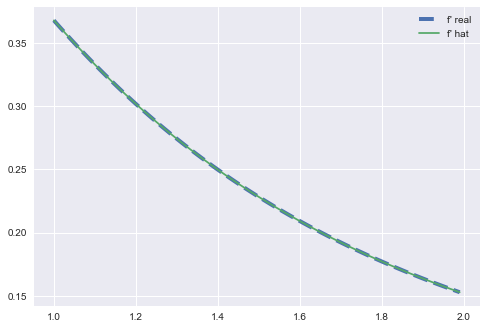

In [47]:
# 3.画出[1,2]上一阶数值微分曲线，比较
def fderihat(f, x, n=5, h=0.5):
    return richardd(f,x,n,h)[n,n]

x_space = np.arange(1,2,0.01)
yd_real_space = f2derireal(x_space)
yd_hat_space = [fderihat(f2,i,n,h) for i in x_space]

plt.style.use("seaborn")
plt.plot(x_space,yd_real_space,'--',label="f' real",lw =4)
plt.plot(x_space,yd_hat_space,label="f' hat")
plt.legend()

与真实值误差图，数量级在1e-15

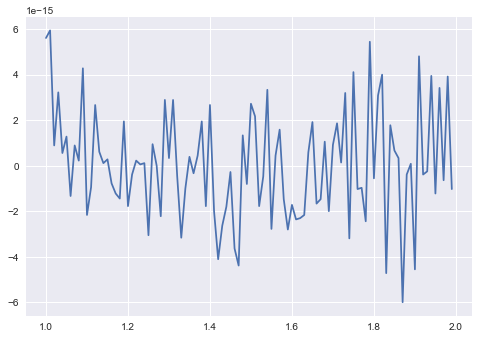

In [48]:
plt.plot(x_space,yd_real_space-yd_hat_space)

### 4.二阶导数

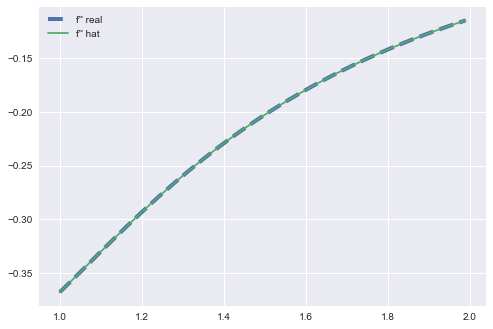

In [49]:
# 4.画出[1,2]上二阶数值微分曲线，比较

def f2derihat(x):
    return fderihat(f2, x, n=5, h=0.1)

def f2ddreal(x):
    y = np.exp(-1/x)*(1/x**4-2/x**3)
    return y

ydd_real_space = f2ddreal(x_space)
ydd_hat_space = [fderihat(f2derihat,i,5,0.1) for i in x_space]
plt.plot(x_space,ydd_real_space,'--',label="f'' real",lw =4)
plt.plot(x_space,ydd_hat_space,label="f'' hat")
plt.legend()

与真实值误差图，数量级在1e-11

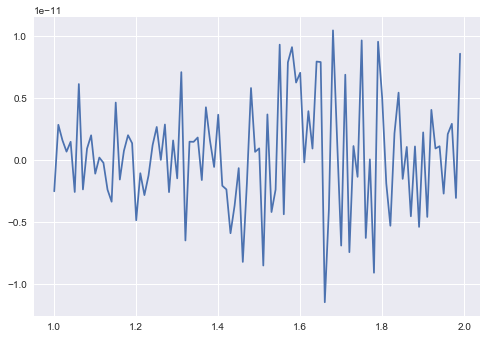

In [50]:
plt.plot(x_space,ydd_real_space-ydd_hat_space)